In [6]:
import pandas as pd 
import numpy as np 
import matplotlib.pylab as plt
import pickle
import datetime as dt
from scipy.interpolate import interp1d
import matplotlib.cm as cm


%matplotlib inline 
from matplotlib.pylab import rcParams 
rcParams['figure.figsize'] = 15, 6

from scipy import stats
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot

f = '../datastore/paystations/32489_59_days_nofree.d' 
key = 32489
data = pickle.load(open(f, 'rb'))
mask = np.all(np.isnan(data), axis=1)
# print 'Removed %d free parking days' % sum(mask)
data = data[~mask]


ts = data.flatten() # make timeseries
hr = np.arange(0,len(ts))





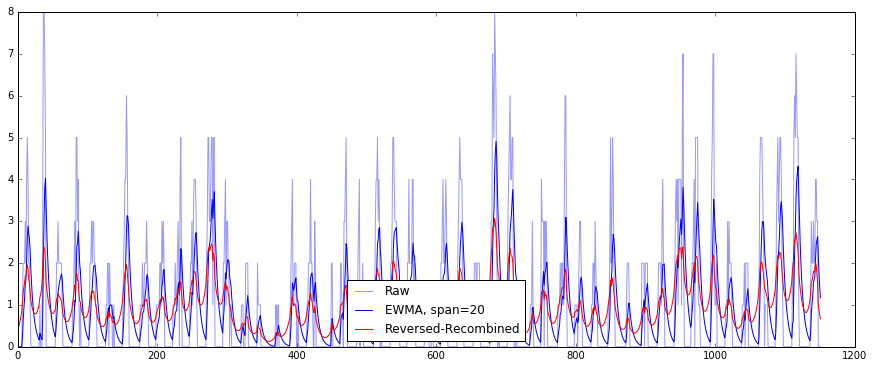

In [11]:
import pandas, numpy as np
ewma = pandas.stats.moments.ewma

plt.plot( ts, alpha=0.4, label='Raw' )

# take EWMA in both directions with a smaller span term
fwd = ewma( ts, span=15 )          # take EWMA in fwd direction
bwd = ewma( ts[::-1], span=15 )    # take EWMA in bwd direction
c = np.vstack(( fwd, bwd[::-1] )) # lump fwd and bwd together
c = np.mean( c, axis=0 )          # average  

# regular EWMA, with bias against trend
plt.plot( ewma( ts, span=10 ), 'b', label='EWMA, span=20' )

# "corrected" (?) EWMA
plt.plot( c, 'r', label='Reversed-Recombined' )

plt.legend(loc=8)
# savefig( 'ewma_correction.png', fmt='png', dpi=100 )

In [5]:
import pandas, numpy
ewma = pandas.stats.moments.ewma
EMOV_n = ewma( ts, com=2 )

xs = numpy.vstack((Xs,EMOV_n))

from sklearn import linear_model
clf = linear_model.LinearRegression()
clf.fit ( xs, ys )
print clf.coef_

NameError: name 'Xs' is not defined